Import necessary libraries

In [12]:
import numpy as np
import pandas as pd
from skimage import io
from skimage import io, exposure
from skimage import util 
from pandas.io.formats.excel import ExcelFormatter
from openpyxl import Workbook
import os
import random


Fill in following data:
- sample_code - will be further used as excel spreadsheet name. If declared sample code already exists as sheet name in excel file, the data will be replaced;
- image_folder - should be filled with path to folder containing analyzed images.
- excel_file - create an excel file for data collection and put path to this file here. If some problems occurs, create new file. 

In [2]:
sample_code = "AT13-1"
image_folder = r"C:\Users\KarolinaPłatek(24777\Desktop\AT13-SEM"
excel_file = r"C:\Users\KarolinaPłatek(24777\Desktop\porosity_2.xlsx"

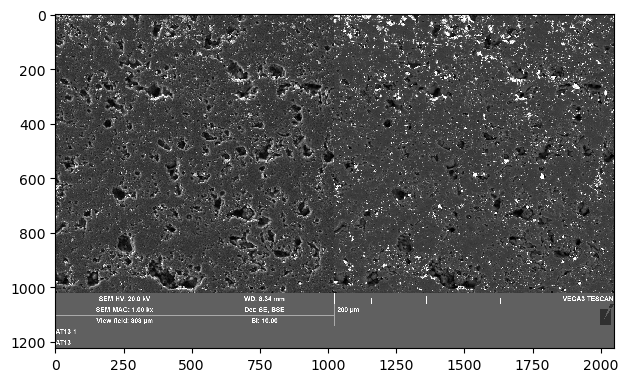

In [3]:
random_file = random.choice(os.listdir(image_folder))
rnd_image = io.imread(image_folder + r"/" + random_file)

io.imshow(rnd_image)

Choose side of the image that further will be proceed. To complete, write 
"right" or "left" 
in the first line below. 

Remember about quotation marks. In case of typo, left side will be selected automatically. 

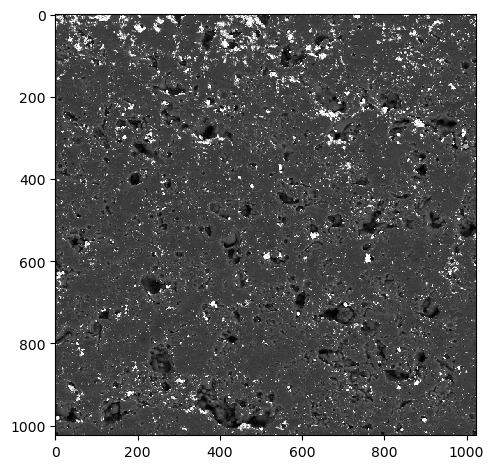

In [4]:
side = "right" #<-- write "right" of "left" to choose the side. 
x = 1024 if side=="right" else 0

rnd_image_cropped = rnd_image[0:1024, x:x+1024] 

io.imshow(rnd_image_cropped)

Contrast and exposure can be changed by changing cutoff and gain values. 
For original image:
    cutoff_value = 0.5
    gain_value = 5

Recommended values:
    cutoff_value = 0.2
    gain_value = 30

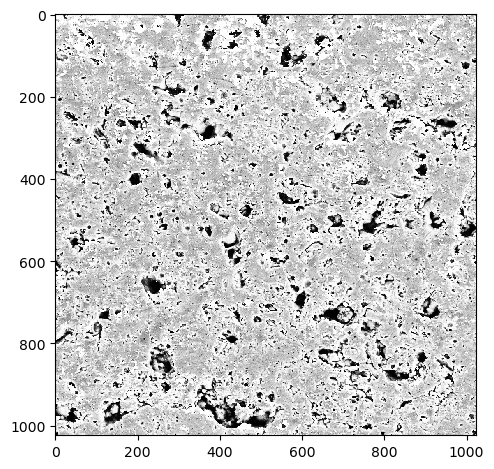

In [5]:
#Contrast settings

cutoff_value = 0.2
gain_value = 30

rnd_image_corrected = exposure.adjust_sigmoid(rnd_image_cropped, cutoff=cutoff_value, gain=gain_value, inv=False)

io.imshow(rnd_image_corrected)



Recommended value of the threshold: 0.05 - 0.2.

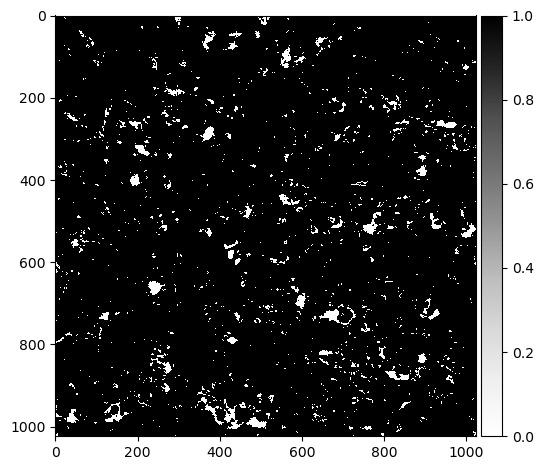

In [7]:
#Binary image - treshold

treshold = 0.12

rnd_binary_image = ((rnd_image_corrected/255)>=treshold).astype(int)
io.imshow(rnd_binary_image,cmap="Greys")


Now, using above declared settings, porosity measurement will be executed on every image from specified folder. Treshold and contrast settings are as declared in previous section. 

In [8]:
#Function

def porosity(input_path):
    input_image = io.imread(image_folder + r"/" + input_path)
    
    cropped_image = input_image[0:1024, x:x+1024] 
    
    corrected_image = exposure.adjust_sigmoid(cropped_image, cutoff=cutoff_value, gain=gain_value, inv=False)
    binary_image = ((corrected_image/255)>=treshold).astype(int)

    porosity = binary_image.size - binary_image.sum() 
    porosity_percentage = (porosity/binary_image.sum())*100
    
    return porosity_percentage



In [9]:
#Results

results = []   
for image in os.listdir(image_folder):
    porosity(image)  
    p = porosity(image)
    results.append([image,p])  

df= pd.DataFrame.from_records(results, columns=["sample_code", "porosity"])

Collected data will be saved in excel file with average and standard deviation included. To display data, remove "#" from last line. 

In [10]:
#Data

mean = df["porosity"].mean()
stdev = df["porosity"].std()
results.append([image,p, mean, stdev])  
df2= pd.DataFrame.from_records(results, columns=["sample_code", "porosity", "mean", "stdev"])


with pd.ExcelWriter(excel_file, engine="openpyxl", mode="a", if_sheet_exists="replace") as writer:
    df2.to_excel(writer, sheet_name=sample_code)

df2


,sample_code,porosity,mean,stdev
0,AT13-1_X1000_1.bmp,5.217444,NaN,NaN
1,AT13-1_X1000_10.bmp,4.540007,NaN,NaN
2,AT13-1_X1000_11.bmp,4.280408,NaN,NaN
3,AT13-1_X1000_12.bmp,2.900333,NaN,NaN
4,AT13-1_X1000_13.bmp,4.016935,NaN,NaN
5,AT13-1_X1000_14.bmp,4.145143,NaN,NaN
6,AT13-1_X1000_15.bmp,3.965163,NaN,NaN
7,AT13-1_X1000_16.bmp,3.550073,NaN,NaN
8,AT13-1_X1000_17.bmp,3.565210,NaN,NaN
9,AT13-1_X1000_18.bmp,3.319177,NaN,NaN
